In [1]:
from transformers import BeitImageProcessor, BeitForImageClassification
from PIL import Image
import requests

# "rescale_factor": 0.00392156862745098,

processor = BeitImageProcessor.from_pretrained('BEiT-diff-detect-old')
#processor = BeitImageProcessor.from_pretrained('microsoft/beit-base-patch16-224-pt22k')
model = BeitForImageClassification.from_pretrained('BEiT-diff-detect-old')

In [4]:
from PIL import Image
  
# open method used to open different extension image file
image = Image.open("2980_saltshaker_edit.jpg") 
#image = Image.open("apple_attention_test.png") 
image = image.convert('RGB')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 21,841 ImageNet-22k classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: postive


In [38]:
outputs

ImageClassifierOutput(loss=None, logits=tensor([[-2.1322,  2.0609]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [23]:
inputs["pixel_values"][0].shape

torch.Size([3, 224, 224])

In [24]:
inputs["pixel_values"][0].T

tensor([[[-0.0980, -0.0745, -0.0353],
         [-0.0980, -0.0745, -0.0353],
         [-0.0980, -0.0745, -0.0353],
         ...,
         [ 0.1294,  0.1686,  0.2000],
         [ 0.1216,  0.1608,  0.1922],
         [ 0.1529,  0.1922,  0.2235]],

        [[-0.0902, -0.0667, -0.0275],
         [-0.0902, -0.0667, -0.0275],
         [-0.0902, -0.0667, -0.0275],
         ...,
         [ 0.1451,  0.1843,  0.2157],
         [ 0.1216,  0.1608,  0.1922],
         [ 0.1451,  0.1843,  0.2157]],

        [[-0.0824, -0.0588, -0.0196],
         [-0.0824, -0.0588, -0.0196],
         [-0.0824, -0.0588, -0.0196],
         ...,
         [ 0.1294,  0.1686,  0.2000],
         [ 0.1294,  0.1686,  0.2000],
         [ 0.1294,  0.1686,  0.2000]],

        ...,

        [[ 0.2314,  0.2549,  0.2941],
         [ 0.2314,  0.2549,  0.2941],
         [ 0.2314,  0.2549,  0.2941],
         ...,
         [ 0.3098,  0.3333,  0.3725],
         [ 0.2863,  0.3098,  0.3490],
         [ 0.2941,  0.3176,  0.3569]],

        [[

In [5]:
import torch

inputs["pixel_values"].requires_grad = True
inputs["labels"] = torch.tensor(0)

out = model.forward(**inputs)
out.loss.backward()
grads = inputs["pixel_values"].grad[0]

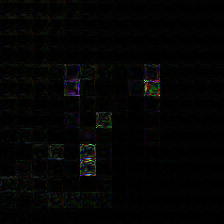

In [6]:
from PIL import Image
import numpy as np
import torch

def array_to_img(arr):
    imgdata = arr.tolist()
    transpose = np.transpose(np.array(imgdata), (1,2,0))
    absolute = np.absolute(transpose)
    #avg_abs = np.average(imgdata,axis=2)
    normalized =  absolute * (255.0/absolute.max())
    integ = normalized.astype(np.uint8)

    img = Image.fromarray(integ, 'RGB')
    return img

array_to_img(grads)

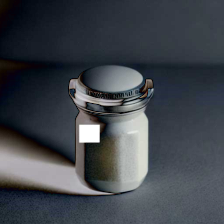

In [7]:
array_to_img(inputs["pixel_values"][0])

logits:  tensor([[ 0.2794, -1.3120]], grad_fn=<AddmmBackward0>)
Predicted class: negative


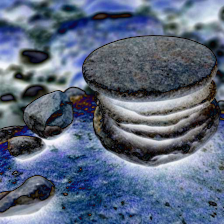

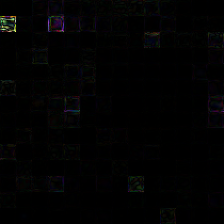

In [21]:
def analyse_image(path=None, img=None):
    if path is not None:
        image = Image.open(path)    
    elif img is not None:
        image = img 
    image = image.convert('RGB')
    inputs = processor(images=image, return_tensors="pt")

    outputs = model(**inputs)
    logits = outputs.logits
    print("logits: ", outputs.logits)
    # model predicts one of the 21,841 ImageNet-22k classes
    predicted_class_idx = logits.argmax(-1).item()
    print("Predicted class:", model.config.id2label[predicted_class_idx])

    inputs["pixel_values"].requires_grad = True
    inputs["labels"] = torch.tensor(0)

    out = model.forward(**inputs)
    out.loss.backward()
    grads = inputs["pixel_values"].grad[0]

    display(array_to_img(inputs["pixel_values"][0]))
    display(array_to_img(grads))

analyse_image("5_cairn.jpg")

logits:  tensor([[-1.5965,  1.3696]], grad_fn=<AddmmBackward0>)
Predicted class: postive


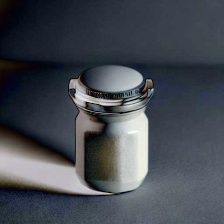

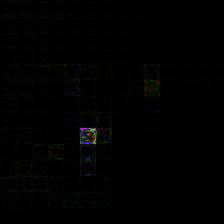

In [47]:
analyse_image("2980_saltshaker.jpg")

logits:  tensor([[-2.1322,  2.0609]], grad_fn=<AddmmBackward0>)
Predicted class: postive


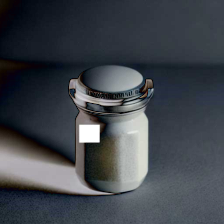

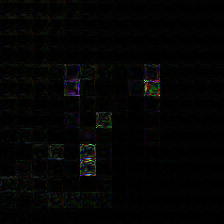

In [48]:
analyse_image("2980_saltshaker_edit.jpg")

logits:  tensor([[-2.7024,  2.7264]], grad_fn=<AddmmBackward0>)
Predicted class: postive


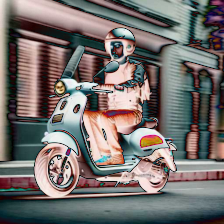

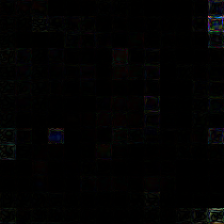

In [49]:
analyse_image("36_motor scooter.jpg")

logits:  tensor([[-2.4339,  2.2430]], grad_fn=<AddmmBackward0>)
Predicted class: postive


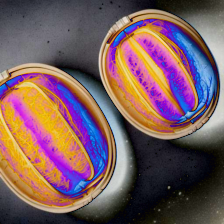

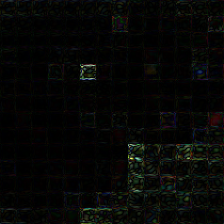

In [50]:
analyse_image("37_spaghetti squash.jpg")

Predicted class: postive


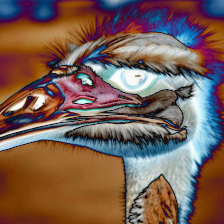

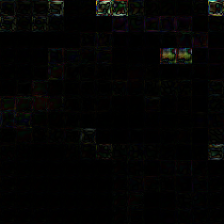

In [43]:
analyse_image("38_ostrich.jpg")

logits:  tensor([[-2.5315,  2.3496]], grad_fn=<AddmmBackward0>)
Predicted class: postive


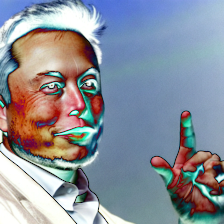

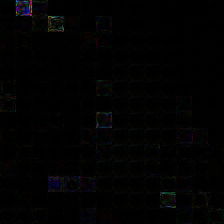

In [51]:
analyse_image("elon2.png")

logits:  tensor([[-0.1532, -0.4188]], grad_fn=<AddmmBackward0>)
Predicted class: negative


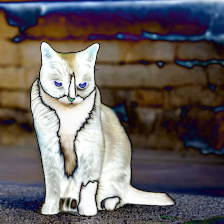

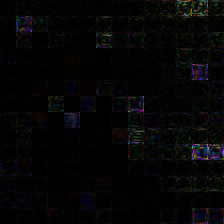

In [52]:
analyse_image("french_cat.png")

In [12]:
from datasets import load_dataset, load_from_disk, interleave_datasets
ds = load_from_disk("../../data/diffusion_and_real/")

In [13]:
ds["test"]

Dataset({
    features: ['image', 'label'],
    num_rows: 1000
})

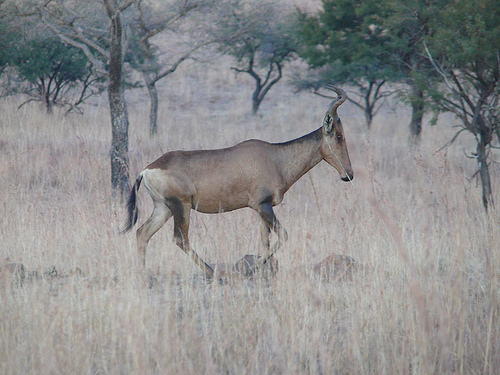

In [22]:
ds["test"][0]["image"]

logits:  tensor([[ 2.1730, -3.1977]], grad_fn=<AddmmBackward0>)
Predicted class: negative


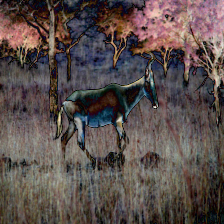

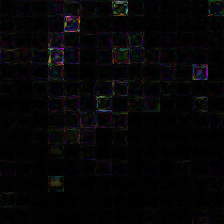

In [24]:
analyse_image(img=ds["test"][0]["image"])